In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [5]:
df=pd.read_csv("cluster_moons.csv")
df

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


In [7]:
print(df.columns)

Index(['X1', 'X2'], dtype='object')


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None


In [19]:
X, y = make_classification(n_samples=1500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

df = pd.DataFrame(X, columns=["X1", "X2"])
df["y"] = y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[["X1", "X2"]], df["y"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def custom_poly_kernel(X1, X2):
    return (np.dot(X1, X2.T) + 1) ** 2  

In [23]:
K_train = custom_poly_kernel(X_train_scaled, X_train_scaled)
K_test = custom_poly_kernel(X_test_scaled, X_train_scaled)

svm_custom = SVC(kernel='precomputed')
svm_custom.fit(K_train, y_train)

y_pred_custom = svm_custom.predict(K_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Kernel SVM Accuracy: {accuracy_custom:.4f}")

Custom Kernel SVM Accuracy: 0.9467


In [27]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train_scaled, y_train)
accuracy_poly = accuracy_score(y_test, svm_poly.predict(X_test_scaled))

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
accuracy_rbf = accuracy_score(y_test, svm_rbf.predict(X_test_scaled))

print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly:.4f}")
print(f"RBF Kernel SVM Accuracy: {accuracy_rbf:.4f}")

Polynomial Kernel SVM Accuracy: 0.5567
RBF Kernel SVM Accuracy: 0.9400


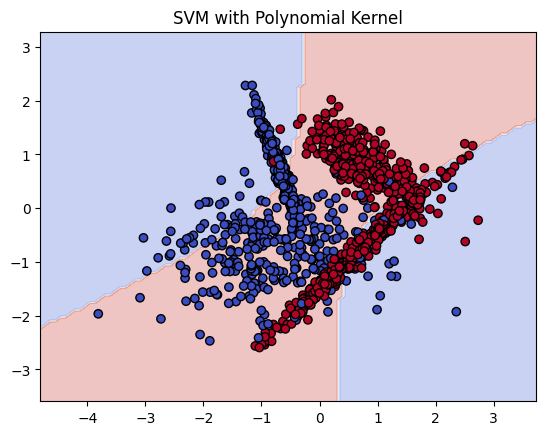

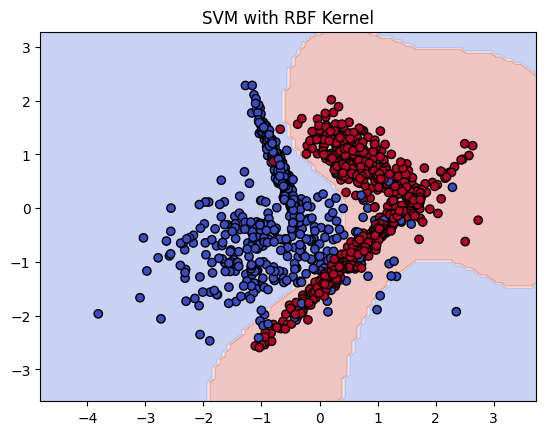

In [29]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()
plot_decision_boundary(svm_poly, X_train_scaled, y_train, "SVM with Polynomial Kernel")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM with RBF Kernel")